# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages, which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission if necessary. 

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the iPython Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission. 

In addition to implementing code, there is a writeup to complete. The writeup should be completed in a separate file, which can be either a markdown file or a pdf document. There is a [write up template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) that can be used to guide the writing process. Completing the code template and writeup template will cover all of the [rubric points](https://review.udacity.com/#!/rubrics/481/view) for this project.

The [rubric](https://review.udacity.com/#!/rubrics/481/view) contains "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. The stand out suggestions are optional. If you decide to pursue the "stand out suggestions", you can include the code in this Ipython notebook and also discuss the results in the writeup file.


>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Step 0: Load The Data

In [1]:
# import
import numpy as np
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import tensorflow as tf
from tensorflow.contrib.layers import flatten
from sklearn.utils import shuffle
import pickle
import pandas as pd
from skimage.transform import rotate, AffineTransform, warp
import random

In [2]:
# Load pickled data
#import pickle

# TODO: Fill this in based on where you saved the training and testing data

training_file = './traffic-signs-data/train.p'
validation_file= './traffic-signs-data/valid.p'
testing_file = './traffic-signs-data/test.p'

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_valid, y_valid = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']

---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 1D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below. Use python, numpy and/or pandas methods to calculate the data summary rather than hard coding the results. For example, the [pandas shape method](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.shape.html) might be useful for calculating some of the summary results. 

### Provide a Basic Summary of the Data Set Using Python, Numpy and/or Pandas

In [3]:
### Replace each question mark with the appropriate value. 
### Use python, pandas or numpy methods rather than hard coding the results
#import numpy as np

# TODO: Number of training examples
n_train = X_train.shape[0]

# TODO: Number of validation examples
n_validation = X_valid.shape[0]

# TODO: Number of testing examples.
n_test = X_test.shape[0]

# TODO: What's the shape of an traffic sign image?
image_shape = X_train.shape[1:]

# TODO: How many unique classes/labels there are in the dataset.
n_classes = np.unique(y_train).shape[0]

# create evaluation data
from sklearn.model_selection import train_test_split
X_train, X_validation, y_train, y_validation = train_test_split(X_train, y_train, test_size = 0.2, random_state = 0)
n_valid = X_validation.shape[0]

print("Number of training examples =", n_train)
print("Number of validation examples =", n_valid)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 34799
Number of validation examples = 6960
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Number of classes = 43


### Include an exploratory visualization of the dataset

Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc. 

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections. It can be interesting to look at the distribution of classes in the training, validation and test set. Is the distribution the same? Are there more examples of some classes than others?

Text(0, 0.5, 'Appearance')

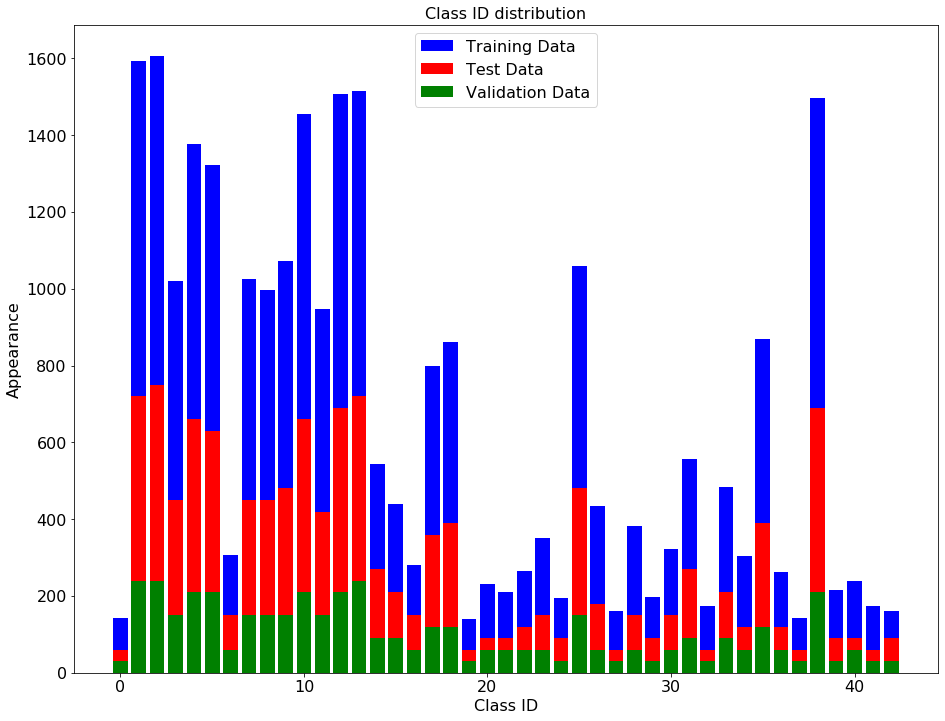

In [4]:
### Data exploration visualization code goes here.
### Feel free to use as many code cells as needed.
#import matplotlib.pyplot as plt
# Visualizations will be shown in the notebook.
%matplotlib inline


signDistributionTrain = list()
signDistributionValid = list()
signDistributionTest = list()
for i in range(0, 43):
    signDistributionTrain.append(y_train[y_train == i].size)
    signDistributionValid.append(y_valid[y_valid == i].size)
    signDistributionTest.append(y_test[y_test == i].size)


fig = plt.figure(figsize=(12,9))
ax = fig.add_axes([0,0,1,1])
ax.bar(range(0,43),signDistributionTrain, color='b')
ax.bar(range(0,43), signDistributionTest,  color='r')
ax.bar(range(0,43), signDistributionValid,  color='g')
ax.legend(labels=['Training Data', 'Test Data', 'Validation Data'], fontsize=16)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.title('Class ID distribution', fontsize=16)
plt.xlabel('Class ID', fontsize=16)
plt.ylabel('Appearance', fontsize=16)



----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play! 

With the LeNet-5 solution from the lecture, you should expect a validation set accuracy of about 0.89. To meet specifications, the validation set accuracy will need to be at least 0.93. It is possible to get an even higher accuracy, but 0.93 is the minimum for a successful project submission. 

There are various aspects to consider when thinking about this problem:

- Neural network architecture (is the network over or underfitting?)
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

### Pre-process the Data Set (normalization, grayscale, etc.)

Minimally, the image data should be normalized so that the data has mean zero and equal variance. For image data, `(pixel - 128)/ 128` is a quick way to approximately normalize the data and can be used in this project. 

Other pre-processing steps are optional. You can try different techniques to see if it improves performance. 

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project.

In [5]:
# generate additional images by changing the given images to have more training data

def imageRotation(x, y, transformations = 5, minAngle = -10, maxAngle = 10):

    xRotated = np.zeros((x.shape[0]*(transformations+1), 32,32,3))
    yRotated = np.zeros(x.shape[0]*(transformations+1))
    idx = 0

    for  xi, yi in zip(x, y):
        
        #add original images to the array
        xRotated[idx] = xi
        yRotated[idx] = yi
        idx = idx + 1

        #rotate image randomly n times and add rotated images to array
        for i in range(transformations):
            #generate random angle
            angle = random.uniform(minAngle, maxAngle)
            xRotated[idx] = rotate(xi, angle)
            yRotated[idx] = yi
            idx = idx+1
              
    return xRotated, yRotated

def imageShift(x,y, transformations = 3, minShift = 1, maxShift = 3):

    xShifted = np.zeros((x.shape[0]*(transformations+1), 32,32,3))
    yShifted = np.zeros(x.shape[0]*(transformations+1))
    idx = 0

    for  xi, yi in zip(x, y):
        
        #add original images to the array
        xShifted[idx] = xi
        yShifted[idx] = yi
        idx = idx + 1

        #shift image randomly n times and add rotated images to array
        for i in range(transformations):
            #generate random shift           
            xShift = random.uniform(minShift, maxShift)
            yShift = random.uniform(minShift, maxShift)
            imgTransform = AffineTransform(translation = (xShift, yShift))

            xShifted[idx] = warp(xi, imgTransform)
            yShifted[idx] = yi
            idx = idx+1
              
    return xShifted, yShifted


def imageShear(x,y, transformations = 5, minShear = -0.2, maxShear = 0.2):

    xSheared = np.zeros((x.shape[0]*(transformations+1), 32,32,3))
    ySheared = np.zeros(x.shape[0]*(transformations+1))
    idx = 0

    for  xi, yi in zip(x, y):
        
        #add original images to the array
        xSheared[idx] = xi
        ySheared[idx] = yi
        idx = idx + 1

        #shift image randomly n times and add rotated images to array
        for i in range(transformations):
            #generate random shift           
            randomShear = random.uniform(minShear, maxShear)
            imgTransform = AffineTransform(shear = randomShear)

            xSheared[idx] = warp(xi, imgTransform)
            ySheared[idx] = yi
            idx = idx+1
              
    return xSheared, ySheared

In [6]:
### Preprocess the data here. It is required to normalize the data. Other preprocessing steps could include 
### converting to grayscale, etc.
### Feel free to use as many code cells as needed.

#normalize images

def rgb2yuv(images):
    imagesYComponents = np.zeros(shape=(images.shape[0:3]))
    for idx, img in enumerate(images):
        imgBuf = cv2.cvtColor(img, cv2.COLOR_RGB2YCrCb)
        y, u, v = cv2.split(imgBuf)
        imagesYComponents[idx] = y
    return imagesYComponents
        
def rgb2gray(images):
    imagesGray = np.zeros(shape=(images.shape[0:3]))
    for idx, img in enumerate(images):
        imagesGray[idx] = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    return imagesGray

def normalizeImages(images):
    return np.absolute((images - 128.0)) / 128.0



X_train.shape:  (27839, 32, 32, 3)
X_validation.shape: (6960, 32, 32, 3)
X_test.shape:  (12630, 32, 32, 3)


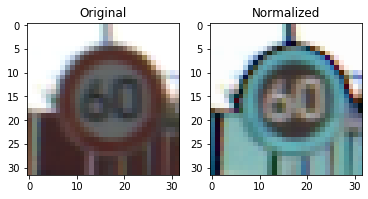

In [7]:
#normalize data
originalImg = X_train[0]
X_train = normalizeImages(X_train)
normalizedImg = X_train[0]
print('X_train.shape: ', X_train.shape)
X_validation = normalizeImages(X_validation)
print('X_validation.shape:', X_validation.shape)
X_test = normalizeImages(X_test)
print('X_test.shape: ', X_test.shape)


plt.figure(figsize=(6,3))
plt.subplot(121)
plt.title('Original')
plt.imshow(originalImg)
plt.subplot(122)
plt.title('Normalized')
plt.imshow(normalizedImg)

In [8]:
# generate additional data by rotating, shifting, shearing images
# than save it to pickle file

# print("Additional data generating started...")
# modifiedX, modifiedY = imageRotation(X_train, y_train, 2)
# print("Rotation done...")
# modifiedX, modifiedY = imageShift(modifiedX, modifiedY, 2)

# print("Shift done...")
#modifiedX, modifiedY = imageShear(X_train, y_train, 2)

print("Additional data generating finished!")
#print("modifiedX.shape: ", modifiedX.shape)

#pickleData = {'features':modifiedX, 'labels':modifiedY}
#pickle.dump( pickleData, open( "./traffic-signs-data/AdditionalData/train.p", "wb" ) )
print("Pickle file saved")

Additional data generating finished!
Pickle file saved


In [9]:
#load additional data from pickle file

pickleFile = open("./traffic-signs-data/AdditionalData/trainShear.p","rb")
pickle_in = pickle.load(pickleFile)
pickleFile.close()

X_train = pickle_in['features']
y_train = pickle_in['labels']

print("X_train.shape: ", X_train.shape)
print("y_train.shape: ", y_train.shape)




X_train.shape:  (55678, 32, 32, 3)
y_train.shape:  (55678,)


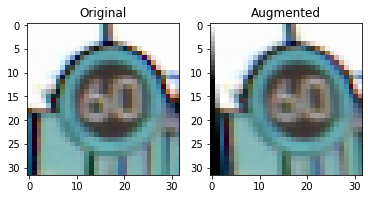

In [10]:
#plot original image and augmented image
plt.figure(figsize=(6,3))
plt.subplot(121)
plt.title('Original')
plt.imshow(normalizedImg)
plt.subplot(122)
plt.title('Augmented')
plt.imshow(X_train[1])

Text(0, 0.5, 'Appearance')

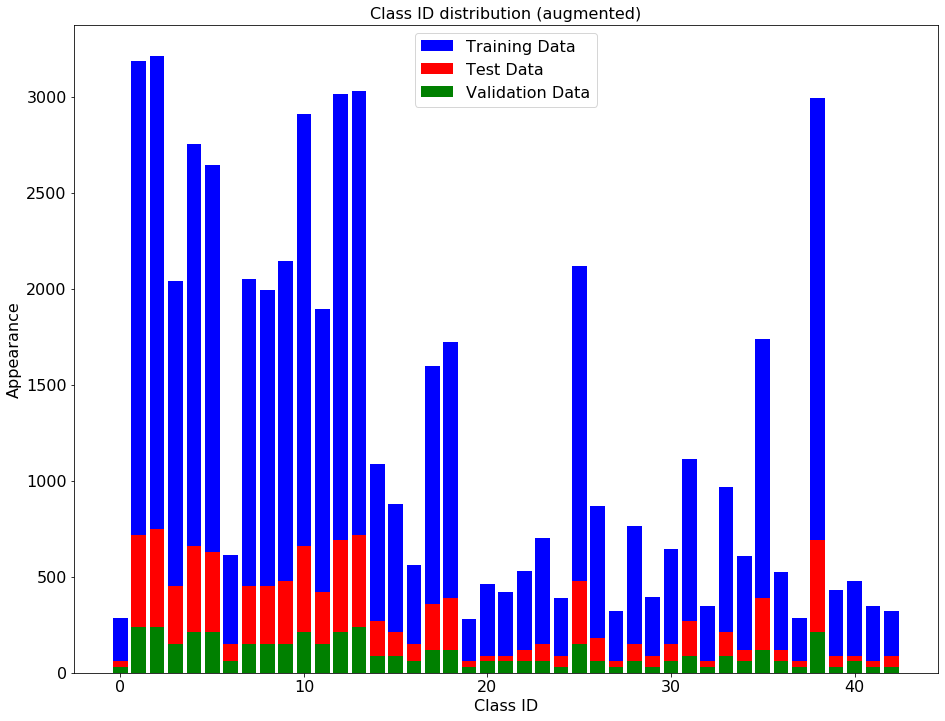

In [11]:
# visualization of augmented data set
%matplotlib inline

signDistributionTrain = list()
signDistributionValid = list()
signDistributionTest = list()
for i in range(0, 43):
    signDistributionTrain.append(y_train[y_train == i].size)
    signDistributionValid.append(y_valid[y_valid == i].size)
    signDistributionTest.append(y_test[y_test == i].size)


fig = plt.figure(figsize=(12,9))
ax = fig.add_axes([0,0,1,1])
ax.bar(range(0,43),signDistributionTrain, color='b')
ax.bar(range(0,43), signDistributionTest,  color='r')
ax.bar(range(0,43), signDistributionValid,  color='g')
ax.legend(labels=['Training Data', 'Test Data', 'Validation Data'], fontsize=16)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.title('Class ID distribution (augmented)', fontsize=16)
plt.xlabel('Class ID', fontsize=16)
plt.ylabel('Appearance', fontsize=16)


### Model Architecture

In [12]:
### Define your architecture here.
### Feel free to use as many code cells as needed.
EPOCHS = 20
BATCH_SIZE = 128
LEARNING_RATE = 0.001
KEEP_PROB = 0.5


In [13]:
#from tensorflow.contrib.layers import flatten

def LeNet(x):    
    # Arguments used for tf.truncated_normal, randomly defines variables for the weights and biases for each layer
    mu = 0
    sigma = 0.1
    
    # Layer 1: Convolutional. Input = 32x32x3. Output = 32x32x32.
    F_W = tf.Variable(tf.truncated_normal(shape=(3, 3, 3, 32), mean = mu, stddev = sigma))
    F_b = tf.Variable(tf.zeros(32))
    strides = [1, 1, 1, 1]
    padding = 'SAME'
    out = tf.nn.conv2d(x, F_W, strides, padding) + F_b
    
    # Activation.
    out = tf.nn.relu(out)
    
    
    # Pooling. Input = 32x32x32. Output = 16x16x32.
    ksize = [1, 2, 2, 1]
    strides = [1, 2, 2, 1]
    padding = 'SAME'
    out = tf.nn.max_pool(out, ksize, strides, padding)
    #################################################################################################

    # Layer 2: Convolutional. Input = 16x16x32 Output = 16x16x64.
    F_W = tf.Variable(tf.truncated_normal(shape=(3, 3, 32, 64), mean = mu, stddev = sigma))
    F_b = tf.Variable(tf.zeros(64))
    strides = [1, 1, 1, 1]
    padding = 'SAME'
    out = tf.nn.conv2d(out, F_W, strides, padding) + F_b
    
    # Activation.
    out = tf.nn.relu(out)

    # Pooling. Input = 16x16x64. Output = 8x8x64.
    ksize = [1, 2, 2, 1]
    strides = [1, 2, 2, 1]
    padding = 'SAME'
    out = tf.nn.max_pool(out, ksize, strides, padding)  
    #################################################################################################
    
    # Layer 3: Convolutional. Input = 8x8x64 Output = 8x8x128.
    F_W = tf.Variable(tf.truncated_normal(shape=(3, 3, 64, 128), mean = mu, stddev = sigma))
    F_b = tf.Variable(tf.zeros(128))
    strides = [1, 1, 1, 1]
    padding = 'SAME'
    out = tf.nn.conv2d(out, F_W, strides, padding) + F_b
    
    # Activation.
    out = tf.nn.relu(out)

    # Pooling. Input = 8x8x128. Output = 4x4x128.
    ksize = [1, 2, 2, 1]
    strides = [1, 2, 2, 1]
    padding = 'SAME'
    out = tf.nn.max_pool(out, ksize, strides, padding)

    # Flatten. Input = 4x4x128. Output = 2048.
    out = flatten(out)
    #################################################################################################
    
  
    # Layer 4: Fully Connected. Input = 2048. Output = 512.
    F_W = tf.Variable(tf.random_normal(shape=(2048, 512), mean = mu, stddev = sigma))
    F_b = tf.Variable(tf.zeros(512))
    out = tf.add(tf.matmul(out, F_W), F_b)
    
    # Activation.
    out = tf.nn.relu(out)
    
    #Dropout
    out = tf.nn.dropout(out, KEEP_PROB)
    #################################################################################################

    # Layer 5: Fully Connected. Input = 512. Output = 128.
    F_W = tf.Variable(tf.random_normal(shape=(512, 128), mean = mu, stddev = sigma))
    F_b = tf.Variable(tf.zeros(128))
    out = tf.add(tf.matmul(out, F_W), F_b)
    
    # Activation.
    out = tf.nn.relu(out)
    
    #Dropout
    out = tf.nn.dropout(out, KEEP_PROB)
    #################################################################################################

    # Layer 6: Fully Connected. Input = 128. Output = 43.
    F_W = tf.Variable(tf.random_normal(shape=(128, 43), mean = mu, stddev = sigma))
    F_b = tf.Variable(tf.zeros(43))
    logits = tf.add(tf.matmul(out, F_W), F_b)
    
    return logits

### Train, Validate and Test the Model

A validation set can be used to assess how well the model is performing. A low accuracy on the training and validation
sets imply underfitting. A high accuracy on the training set but low accuracy on the validation set implies overfitting.

In [14]:
### Train your model here.
### Calculate and report the accuracy on the training and validation set.
### Once a final model architecture is selected, 
### the accuracy on the test set should be calculated and reported as well.
### Feel free to use as many code cells as needed.
#import tensorflow as tf

x = tf.placeholder(tf.float32, (None, 32, 32, 3))
y = tf.placeholder(tf.int32, (None))
one_hot_y = tf.one_hot(y, 43)

rate = 0.001

logits = LeNet(x)
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(labels=one_hot_y, logits=logits)
loss_operation = tf.reduce_mean(cross_entropy)
optimizer = tf.train.AdamOptimizer(learning_rate = rate)
training_operation = optimizer.minimize(loss_operation)



Instructions for updating:
Use keras.layers.flatten instead.
Instructions for updating:
Please use `layer.__call__` method instead.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See `tf.nn.softmax_cross_entropy_with_logits_v2`.



In [15]:
correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
saver = tf.train.Saver()

def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples

In [14]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    num_examples = len(X_train)
    
    print("Training...")
    print()
    for i in range(EPOCHS):
        X_train, y_train = shuffle(X_train, y_train)
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = X_train[offset:end], y_train[offset:end]
            sess.run(training_operation, feed_dict={x: batch_x, y: batch_y})
            
        train_accuracy = evaluate(X_train, y_train)
        validation_accuracy = evaluate(X_validation, y_validation)
        print("EPOCH {} ...".format(i+1))
        print("Train Accuracy = {:.3f}".format(train_accuracy))
        print("Validation Accuracy = {:.3f}".format(validation_accuracy))
        print()
        
    saver.save(sess, './model/traffic_sign_model')
    print("Model saved")

Training...

EPOCH 1 ...
Train Accuracy = 0.492
Validation Accuracy = 0.478

EPOCH 2 ...
Train Accuracy = 0.779
Validation Accuracy = 0.764

EPOCH 3 ...
Train Accuracy = 0.885
Validation Accuracy = 0.865

EPOCH 4 ...
Train Accuracy = 0.933
Validation Accuracy = 0.910

EPOCH 5 ...
Train Accuracy = 0.958
Validation Accuracy = 0.940

EPOCH 6 ...
Train Accuracy = 0.967
Validation Accuracy = 0.946

EPOCH 7 ...
Train Accuracy = 0.977
Validation Accuracy = 0.959

EPOCH 8 ...
Train Accuracy = 0.983
Validation Accuracy = 0.964

EPOCH 9 ...
Train Accuracy = 0.983
Validation Accuracy = 0.967

EPOCH 10 ...
Train Accuracy = 0.983
Validation Accuracy = 0.968

EPOCH 11 ...
Train Accuracy = 0.982
Validation Accuracy = 0.966

EPOCH 12 ...
Train Accuracy = 0.987
Validation Accuracy = 0.969

EPOCH 13 ...
Train Accuracy = 0.984
Validation Accuracy = 0.968

EPOCH 14 ...
Train Accuracy = 0.981
Validation Accuracy = 0.966

EPOCH 15 ...
Train Accuracy = 0.993
Validation Accuracy = 0.976

EPOCH 16 ...
Train Ac

In [15]:
# Test
with tf.Session() as sess:
    saver.restore(sess, './model/traffic_sign_model')

    test_accuracy = evaluate(X_test, y_test)
    print("Test Accuracy = {:.3f}".format(test_accuracy))

INFO:tensorflow:Restoring parameters from ./model/traffic_sign_model
Test Accuracy = 0.868


---

## Step 3: Test a Model on New Images

To give yourself more insight into how your model is working, download at least five pictures of German traffic signs from the web and use your model to predict the traffic sign type.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Load and Output the Images

In [20]:
# read all images from folder
import os

def readNewImages():
    
    imgNumber = len(os.listdir("./new_images/five_signs/"))
    newImages = np.empty([imgNumber, 32,32,3], dtype = int)
    idx = 0

    for imgName in os.listdir("./new_images/five_signs/"):
        img = cv2.imread('./new_images/five_signs/' + imgName)
        rgbImg = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

        resizedImg = cv2.resize(rgbImg, (32,32))
        newImages[idx] = resizedImg
        idx = idx+1
        
    return newImages



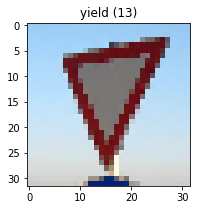

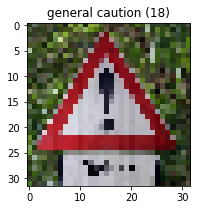

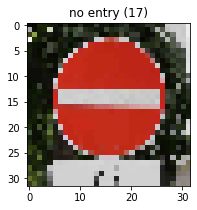

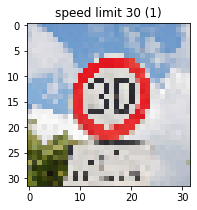

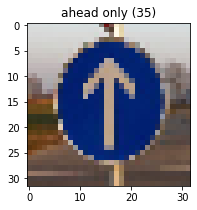

In [21]:
X_newImages = readNewImages()
Y_newImages = [13,18,17, 1,35]  #according to signnames.csv
newImages_Name = ['yield', 'general caution', 'no entry', 'speed limit 30', 'ahead only']  #according to signnames.csv
X_newNormalizedImages = normalizeImages(X_newImages)

for img, name, label in zip(X_newImages, newImages_Name, Y_newImages):
    plt.figure(figsize=(3,3))
    plt.title(name + ' (' + str(label) + ')')
    plt.imshow(img)


<strong>The submission includes five new German Traffic signs found on the web, and the images are visualized. Discussion is made as to particular qualities of the images or traffic signs in the images that are of interest, such as whether they would be difficult for the model to classify.</strong>

* The five german signs, which I found in the Web were resized to 32x32x3 so that this images can be processed by the developed CNN. 
* Some information can be lost by images resizing (original resolution was 200x200), it can make them difficult for the model to classify. 
* This signs are from different sign-groups to test the model on different sign-groups. 
* The signs have also different perspective (Yield sign is rotated) and different size (30 km/h is smaller in the image). It can also make this signs difficult for the model to classify.
* The signs have relatively high contrast to the surrounding area, because all images were made by day. The higher contrast can be helpfull for the model to classify.


### Predict the Sign Type for Each Image

In [22]:
### Run the predictions here and use the model to output the prediction for each image.
### Make sure to pre-process the images with the same pre-processing pipeline used earlier.
### Feel free to use as many code cells as needed.

with tf.Session() as sess:
    saver.restore(sess, './model/traffic_sign_model')
    
    prediction = np.argmax(np.array(sess.run(logits, feed_dict={x: X_newNormalizedImages})), axis=1)
    
    print(prediction)

INFO:tensorflow:Restoring parameters from ./model/traffic_sign_model
[13 18 17 12 35]


### Analyze Performance

In [23]:
### Calculate the accuracy for these 5 new images. 
### For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate on these new images.

#calculate matches
correctSignCounter = 0
for signId, predictedSignId in zip(Y_newImages, prediction):
    if signId == predictedSignId:
        correctSignCounter+=1
        
#calculate percent of correct predicted signs
correctPercent = (correctSignCounter/len(Y_newImages)) * 100

print(correctPercent, '%')

80.0 %


### Output Top 5 Softmax Probabilities For Each Image Found on the Web

For each of the new images, print out the model's softmax probabilities to show the **certainty** of the model's predictions (limit the output to the top 5 probabilities for each image). [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. 

The example below demonstrates how tf.nn.top_k can be used to find the top k predictions for each image.

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example. The values in the array represent predictions. The array contains softmax probabilities for five candidate images with six possible classes. `tf.nn.top_k` is used to choose the three classes with the highest probability:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

In [24]:
### Print out the top five softmax probabilities for the predictions on the German traffic sign images found on the web. 
### Feel free to use as many code cells as needed.

with tf.Session() as sess:

    # restore saved session
    saver.restore(sess, './model/traffic_sign_model')

    # certainty of predictions
    K = 5
    top5 = sess.run(tf.nn.top_k(logits, k=K), feed_dict={x: X_newNormalizedImages})


INFO:tensorflow:Restoring parameters from ./model/traffic_sign_model


In [25]:
#print top 3 probabilities
probability = top5[0]
index = top5[1]

for name, label, pred, p, i in zip(newImages_Name, Y_newImages, prediction, probability, index):
    print('name: {}, '.format(name) + ' '*(15-len(name)) + 'class id: {}, '.format(label)+' '*(6-len(str(label)))+ 'prediction: {}'.format(pred))
    for pp, ii in zip(p,i):
        print(' '*4 + 'prediction calss id: '+ str(ii) + ',' + ' '*(6-len(str(ii))) + 'probability: ' + str(round(pp, 2)))
    print('')

name: yield,           class id: 13,     prediction: 13
    prediction calss id: 13,    probability: 76.22
    prediction calss id: 12,    probability: 37.1
    prediction calss id: 4,     probability: 26.45
    prediction calss id: 5,     probability: 15.39
    prediction calss id: 10,    probability: 13.94

name: general caution, class id: 18,     prediction: 18
    prediction calss id: 18,    probability: 32.16
    prediction calss id: 29,    probability: 15.55
    prediction calss id: 27,    probability: 12.95
    prediction calss id: 24,    probability: 9.08
    prediction calss id: 33,    probability: 2.37

name: no entry,        class id: 17,     prediction: 17
    prediction calss id: 17,    probability: 29.8
    prediction calss id: 14,    probability: 16.41
    prediction calss id: 12,    probability: 10.9
    prediction calss id: 10,    probability: 8.35
    prediction calss id: 9,     probability: 7.63

name: speed limit 30,  class id: 1,      prediction: 12
    prediction 

In [91]:
# read sign names from csv
dataFrame = pd.read_csv('./signnames.csv')

def getSignNameByClassId(idx):
    return dataFrame.loc[dataFrame['ClassId'] == idx]['SignName'][idx]

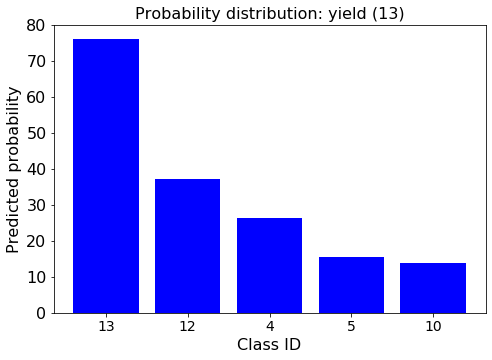

Traffic sign IDs:
13  Yield
12  Priority road
4   Speed limit (70km/h)
5   Speed limit (80km/h)
10  No passing for vehicles over 3.5 metric tons


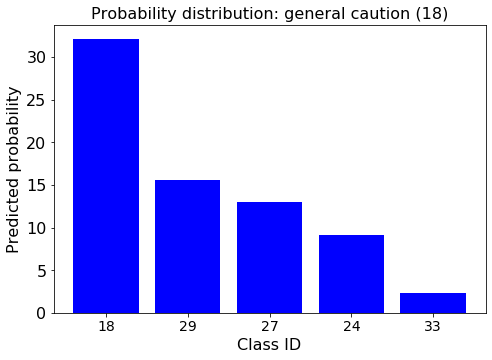

Traffic sign IDs:
18  General caution
29  Bicycles crossing
27  Pedestrians
24  Road narrows on the right
33  Turn right ahead


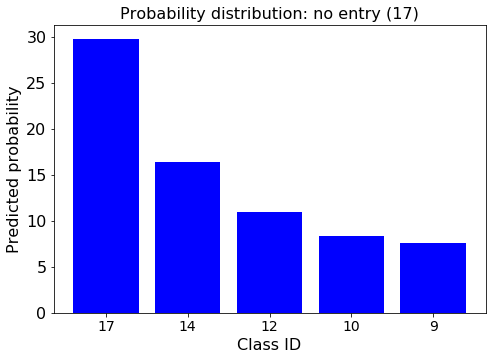

Traffic sign IDs:
17  No entry
14  Stop
12  Priority road
10  No passing for vehicles over 3.5 metric tons
9   No passing


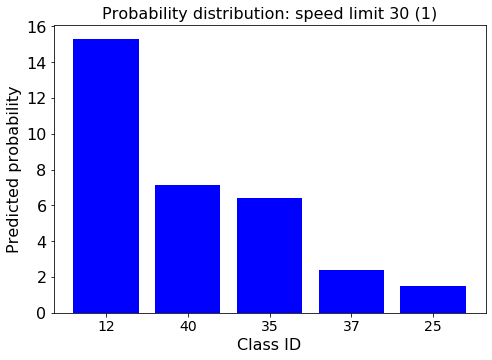

Traffic sign IDs:
12  Priority road
40  Roundabout mandatory
35  Ahead only
37  Go straight or left
25  Road work


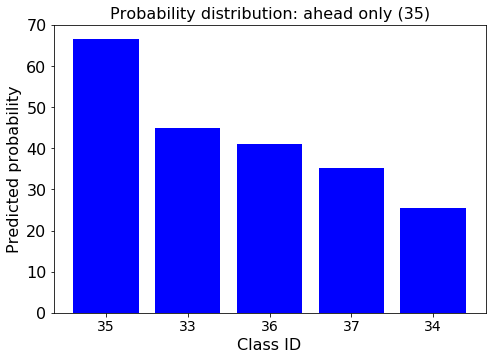

Traffic sign IDs:
35  Ahead only
33  Turn right ahead
36  Go straight or right
37  Go straight or left
34  Turn left ahead


''

In [103]:
# plot probabilities as bar diagramm
%matplotlib inline


for idx, prob, lab, name in zip(index, probability, Y_newImages, newImages_Name):

    #fig = plt.subplot(121)
    fig = plt.figure(figsize=(6,4))
    ax = fig.add_axes([0,0,1,1])
    ax.bar(range(0,5),prob, color='b')
    plt.xticks(range(0, 5), fontsize=14)
    plt.yticks(fontsize=16)
    
           
    ax.set_xticklabels(idx)
    plt.title('Probability distribution: ' + name + ' (' + str(lab) + ')', fontsize=16)
    plt.xlabel('Class ID', fontsize=16)
    plt.ylabel('Predicted probability', fontsize=16)
    plt.show()
    
    #get sign names
    print('Traffic sign IDs:')
    for i in idx:
        print(str(i)+ ' '*(4-len(str(i))) + getSignNameByClassId(i))

;

### Project Writeup

Once you have completed the code implementation, document your results in a project writeup using this [template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) as a guide. The writeup can be in a markdown or pdf file. 

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.

---

## Step 4 (Optional): Visualize the Neural Network's State with Test Images

 This Section is not required to complete but acts as an additional excersise for understaning the output of a neural network's weights. While neural networks can be a great learning device they are often referred to as a black box. We can understand what the weights of a neural network look like better by plotting their feature maps. After successfully training your neural network you can see what it's feature maps look like by plotting the output of the network's weight layers in response to a test stimuli image. From these plotted feature maps, it's possible to see what characteristics of an image the network finds interesting. For a sign, maybe the inner network feature maps react with high activation to the sign's boundary outline or to the contrast in the sign's painted symbol.

 Provided for you below is the function code that allows you to get the visualization output of any tensorflow weight layer you want. The inputs to the function should be a stimuli image, one used during training or a new one you provided, and then the tensorflow variable name that represents the layer's state during the training process, for instance if you wanted to see what the [LeNet lab's](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) feature maps looked like for it's second convolutional layer you could enter conv2 as the tf_activation variable.

For an example of what feature map outputs look like, check out NVIDIA's results in their paper [End-to-End Deep Learning for Self-Driving Cars](https://devblogs.nvidia.com/parallelforall/deep-learning-self-driving-cars/) in the section Visualization of internal CNN State. NVIDIA was able to show that their network's inner weights had high activations to road boundary lines by comparing feature maps from an image with a clear path to one without. Try experimenting with a similar test to show that your trained network's weights are looking for interesting features, whether it's looking at differences in feature maps from images with or without a sign, or even what feature maps look like in a trained network vs a completely untrained one on the same sign image.

<figure>
 <img src="visualize_cnn.png" width="380" alt="Combined Image" />
 <figcaption>
 <p></p> 
 <p style="text-align: center;"> Your output should look something like this (above)</p> 
 </figcaption>
</figure>
 <p></p> 


In [ ]:
### Visualize your network's feature maps here.
### Feel free to use as many code cells as needed.

# image_input: the test image being fed into the network to produce the feature maps
# tf_activation: should be a tf variable name used during your training procedure that represents the calculated state of a specific weight layer
# activation_min/max: can be used to view the activation contrast in more detail, by default matplot sets min and max to the actual min and max values of the output
# plt_num: used to plot out multiple different weight feature map sets on the same block, just extend the plt number for each new feature map entry

def outputFeatureMap(image_input, tf_activation, activation_min=-1, activation_max=-1 ,plt_num=1):
    # Here make sure to preprocess your image_input in a way your network expects
    # with size, normalization, ect if needed
    # image_input =
    # Note: x should be the same name as your network's tensorflow data placeholder variable
    # If you get an error tf_activation is not defined it may be having trouble accessing the variable from inside a function
    activation = tf_activation.eval(session=sess,feed_dict={x : image_input})
    featuremaps = activation.shape[3]
    plt.figure(plt_num, figsize=(15,15))
    for featuremap in range(featuremaps):
        plt.subplot(6,8, featuremap+1) # sets the number of feature maps to show on each row and column
        plt.title('FeatureMap ' + str(featuremap)) # displays the feature map number
        if activation_min != -1 & activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin =activation_min, vmax=activation_max, cmap="gray")
        elif activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmax=activation_max, cmap="gray")
        elif activation_min !=-1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin=activation_min, cmap="gray")
        else:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", cmap="gray")